In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import folium

from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

!pip install eli5
import eli5

sns.set(style="whitegrid")
pd.set_option("display.max_columns", 36)

data = pd.read_csv('https://query.data.world/s/rdjnnhgipkjqptba3keypwrzuk4swp?dws=00000')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=40b285a72be7a18f573bdd7f5022b993f4629a094a04bd8327d2a03294b099b0
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [5]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

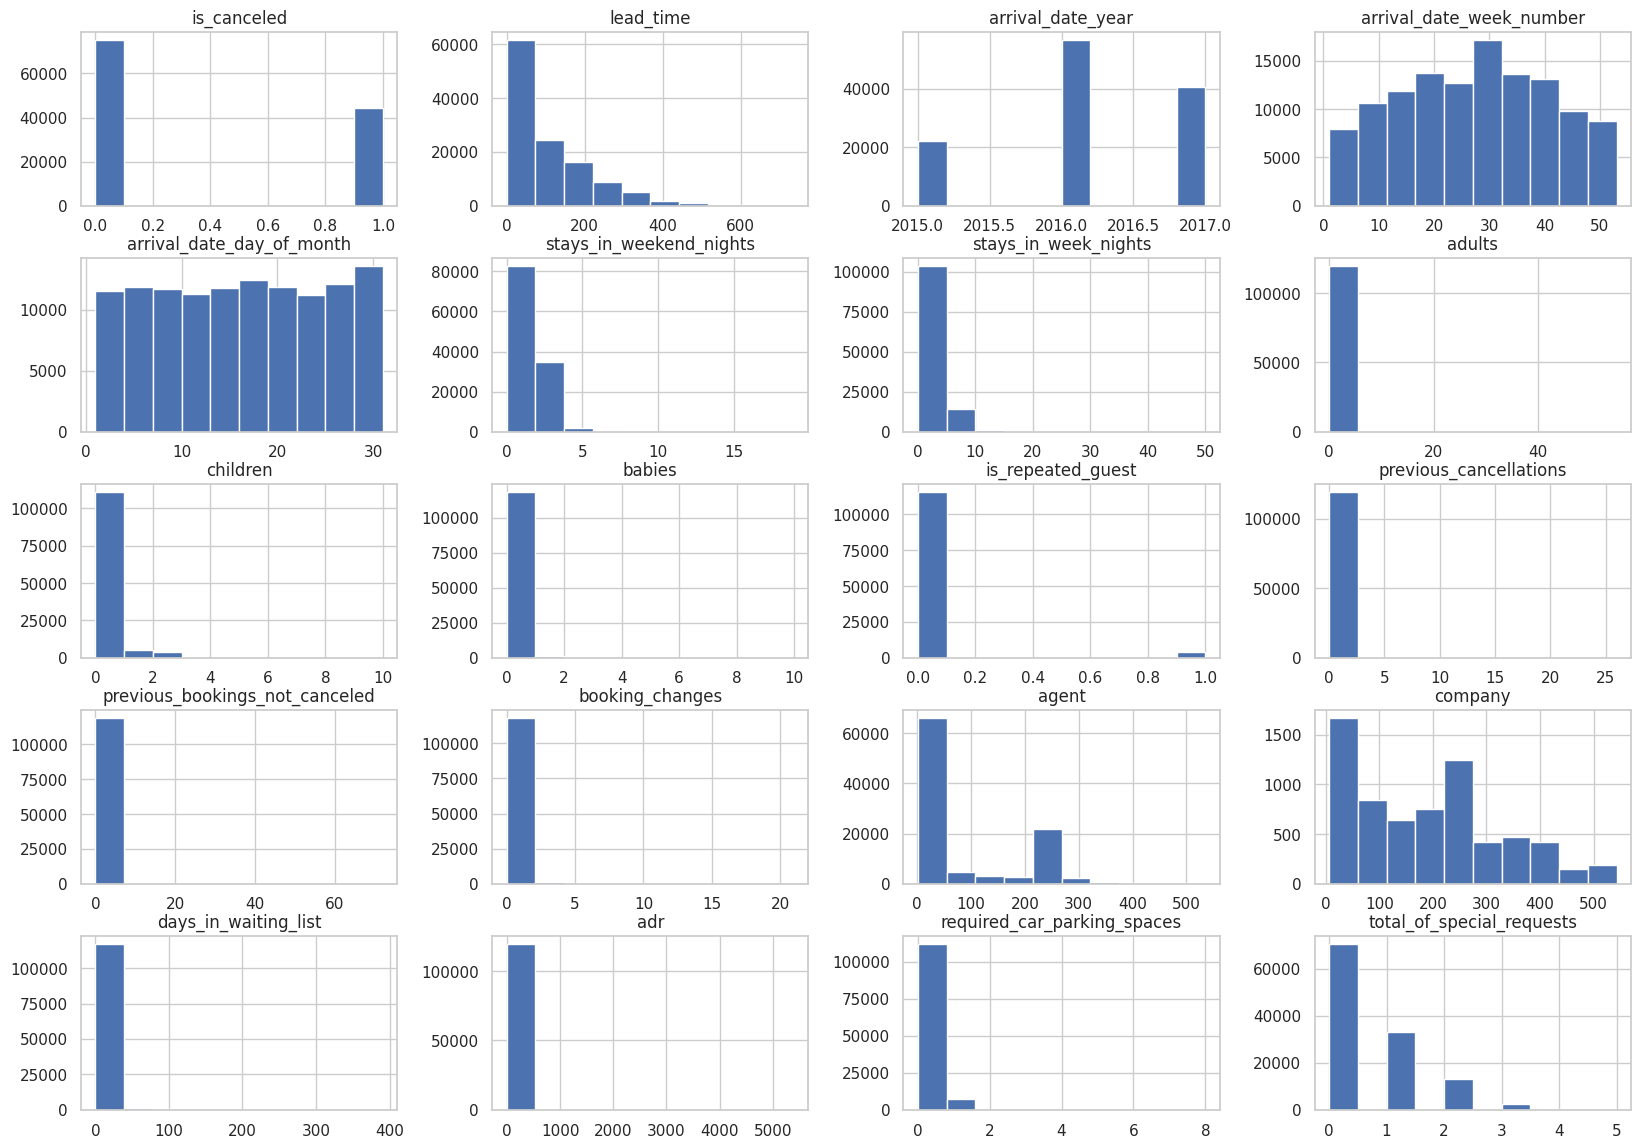

In [9]:
data.hist(figsize=(20,14))
plt.show()

In [10]:
#Agent, company, children 0 인 것 삭제
nan_replacenets = {"children:": 0.0, "country": "Unknown", "agent:0": 0, "company": 0}
full_data_cln = data.fillna(nan_replacenets)

In [11]:
#meal 예약 알 수 없거나 하지 않은 것 삭제
full_data_cln["meal"].replace("Undefined","SC",inplace=True)

In [12]:
#인원 0 인것 삭제
zero_guests=list(full_data_cln.loc[full_data_cln["adults"]
                    +full_data_cln["children"]
                    +full_data_cln["babies"]==0].index)
full_data_cln.drop(full_data_cln.index[zero_guests],inplace=True)

In [13]:
#남은 데이터
full_data_cln.shape

(119210, 32)

#EDA

In [14]:
#city hotel/ resort hotel 나누기
#취소건 제외 실 방문 고객 수
rh=full_data_cln.loc[(full_data_cln["hotel"]=="Resort Hotel")
&(full_data_cln["is_canceled"]==0)]
ch=full_data_cln.loc[(full_data_cln["hotel"]=="City Hotel")
&(full_data_cln["is_canceled"]==0)]

방문 고객 나라

In [15]:
#2% 이하는 other 로 표시
country_data = pd.DataFrame(full_data_cln.loc[full_data_cln["is_canceled"] == 0]["country"].value_counts())
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index

In [16]:
fig=px.pie(country_data,
           values="Number of Guests",
           names="country",
           title="Home country of guests",
           template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

1: 포트투갈 28%
2: 영국 12.9%
3: 프랑스 11.3%

In [17]:
guest_map=px. choropleth(country_data,
                       locations=country_data.index,
                       color=country_data["Guests in %"],
                       hover_name=country_data.index,
                       color_continuous_scale=px.colors.sequential.Plasma,
                       title="Home country of guests")
guest_map.show()

주로 유럽 방문객임을 확인

In [18]:
#아기 제외, 비용 지불 고객 수 확인
rh["adr_pp"]=rh["adr"]/(rh["adults"]+rh["children"])
ch["adr_pp"]=ch["adr"]/(ch["adults"]+ch["children"])

<ipython-input-18-fc5211089824>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-fc5211089824>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
#일 당, 인 당 사용 평균 사용 비용
print("""From all non-canceled bookins, across all room types and meas, the average prices are:
Resort hotel:{:.2f} $ per night and person.
City hotel:{:.2f} $ per night and person."""
    .format(rh["adr_pp"].mean(), ch["adr_pp"].mean()))

From all non-canceled bookins, across all room types and meas, the average prices are:
Resort hotel:47.49 $ per night and person.
City hotel:59.27 $ per night and person.


리조트 호텔: 47.5 $
시티 호텔: 60 $

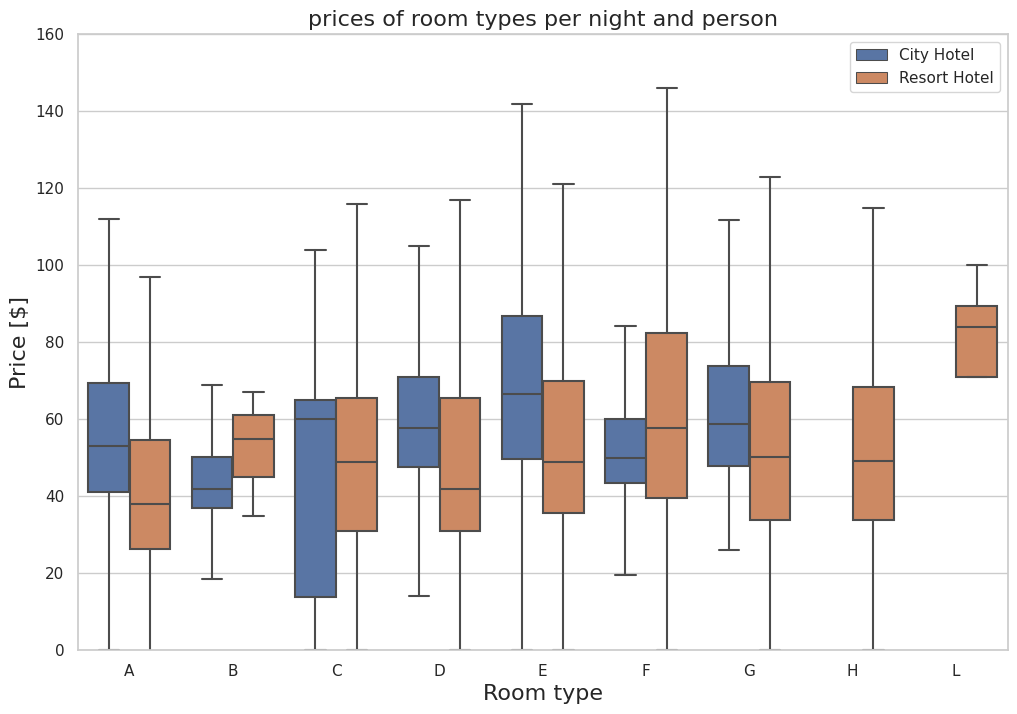

In [20]:
#취소 인원 제외 평균 하루 사용 비용
full_data_cln["adr_pp"]=full_data_cln["adr"]/(full_data_cln["adults"]+full_data_cln["children"])
full_data_guests=full_data_cln.loc[full_data_cln["is_canceled"]==0]
room_prices=full_data_guests[["hotel","reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

plt.figure(figsize=(12,8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices,
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("prices of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [$]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0,160)
plt.show()

룸 당 평균 가격(+타입별, 표준편차)


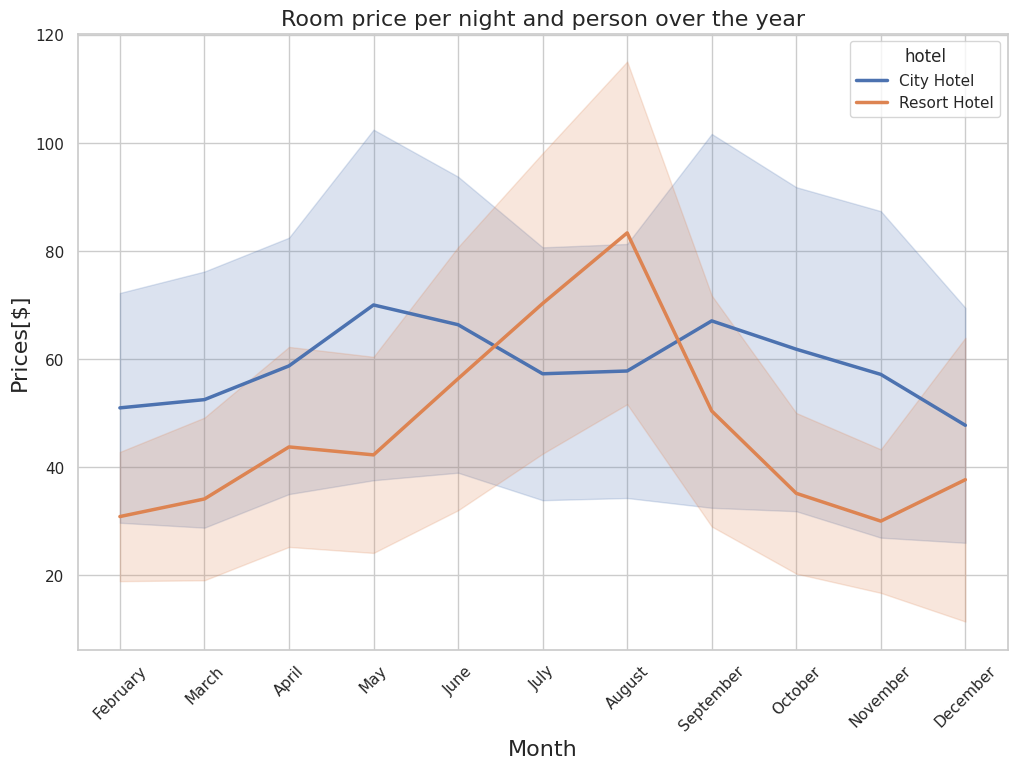

In [21]:
#1년간 하루 사용 비용 변화
room_prices_monthly=full_data_guests[["hotel", "arrival_date_month", "adr_pp"]] .sort_values("arrival_date_month")

ordered_month=["Janurary", "February", "March", "April","May","June","July","August","September","October","November","December"]
room_prices_monthly["arrival_date_month"]=pd.Categorical(room_prices_monthly["arrival_date_month"], categories= ordered_month, ordered=True)

plt.figure(figsize=(12,8))
sns.lineplot(x="arrival_date_month",
             y="adr_pp",
             hue="hotel",
             data=room_prices_monthly,
             hue_order=["City Hotel","Resort Hotel"],
             errorbar="sd",
             size="hotel", sizes=(2.5,2.5))
plt.title("Room price per night and person over the year",
          fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Prices[$]",fontsize=16)
plt.xticks(rotation=45)
plt.show()

*   City Hotel: 변화가 크지 않고, 봄/가을 동안 제일 비쌈
*   Resort Hotel: 여름이 가장 비쌈

In [22]:
#가장 바쁜 달
#데이터프레임 concat
resort_guests_monthly=rh.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly=ch.groupby("arrival_date_month")["hotel"].count()

resort_guests_date=pd.DataFrame({"month":list(resort_guests_monthly.index),
                                 "hotel":"Resort hotel",
                                 "guests":list(resort_guests_monthly.values)})

city_guests_date=pd.DataFrame({"month":list(city_guests_monthly.index),
                               "hotel":"City hotel",
                               "guests":list(city_guests_monthly.values)})

full_guest_data=pd.concat([resort_guests_date, city_guests_date], ignore_index=True)

In [23]:
#월 별
ordered_months=["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"]=pd.Categorical(full_guest_data["month"], categories=ordered_month, ordered=True)

In [24]:
# 7, 8 월 3년간 데이터 + 그 외 월 2년간 데이터 평균 계산
full_guest_data.loc[(full_guest_data["month"]=="July") |
                     (full_guest_data["month"]=="August"),
                    "guests"]/=3
full_guest_data.loc[~((full_guest_data["month"]=="July") |
                       (full_guest_data["month"]=="August")),
                        "guests"]/=2

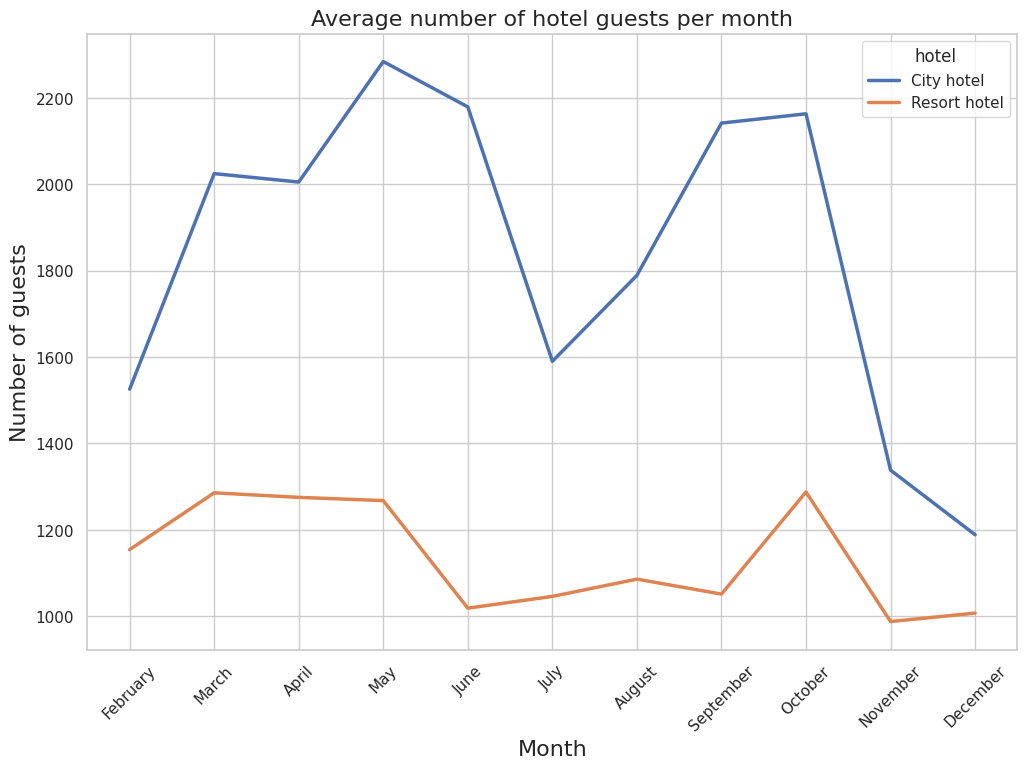

In [25]:
plt.figure(figsize=(12,8))
sns.lineplot(x="month",
             y="guests",
             hue="hotel",
             data=full_guest_data,
             hue_order=["City hotel","Resort hotel"],
             size="hotel",
             sizes=(2.5,2.5))

plt.title("Average number of hotel guests per month",
          fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

* City hotel: 봄, 가을에 제일 많이 방문/ 제일 비싼 가격, 여름에 덜 오고 저렴
* Resort hotel: 6월부터 9월까지 점진적으로 줄어듦/ 제일 비싼 가격
두 호텔 다 겨울에 가장 적게 방문

In [26]:
#투숙 일수
rh["total_nights"]=rh["stays_in_weekend_nights"]+rh["stays_in_week_nights"]
ch["total_nights"]=ch["stays_in_weekend_nights"]+ch["stays_in_week_nights"]

num_nights_res=list(rh["total_nights"].value_counts().index)
num_bookings_res=list(rh["total_nights"].value_counts())
rel_booking_res=rh["total_nights"].value_counts()/sum(num_bookings_res)*100

num_nights_cty=list(ch["total_nights"].value_counts().index)
num_bookings_cty=list(ch["total_nights"].value_counts())
rel_booking_cty=ch["total_nights"].value_counts() / sum(num_bookings_cty)*100

res_nights=pd.DataFrame({"hotel":"Resort hotel",
                         "num_nights":num_nights_res,
                         "rel_num_booking":rel_booking_res})

cty_nights=pd.DataFrame({"hotel":"City hotel",
                         "num_nights":num_nights_cty,
                         "rel_num_booking": rel_booking_cty})
nights_data=pd.concat([res_nights,cty_nights], ignore_index=True)

<ipython-input-26-7e14bfb464fb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-7e14bfb464fb>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



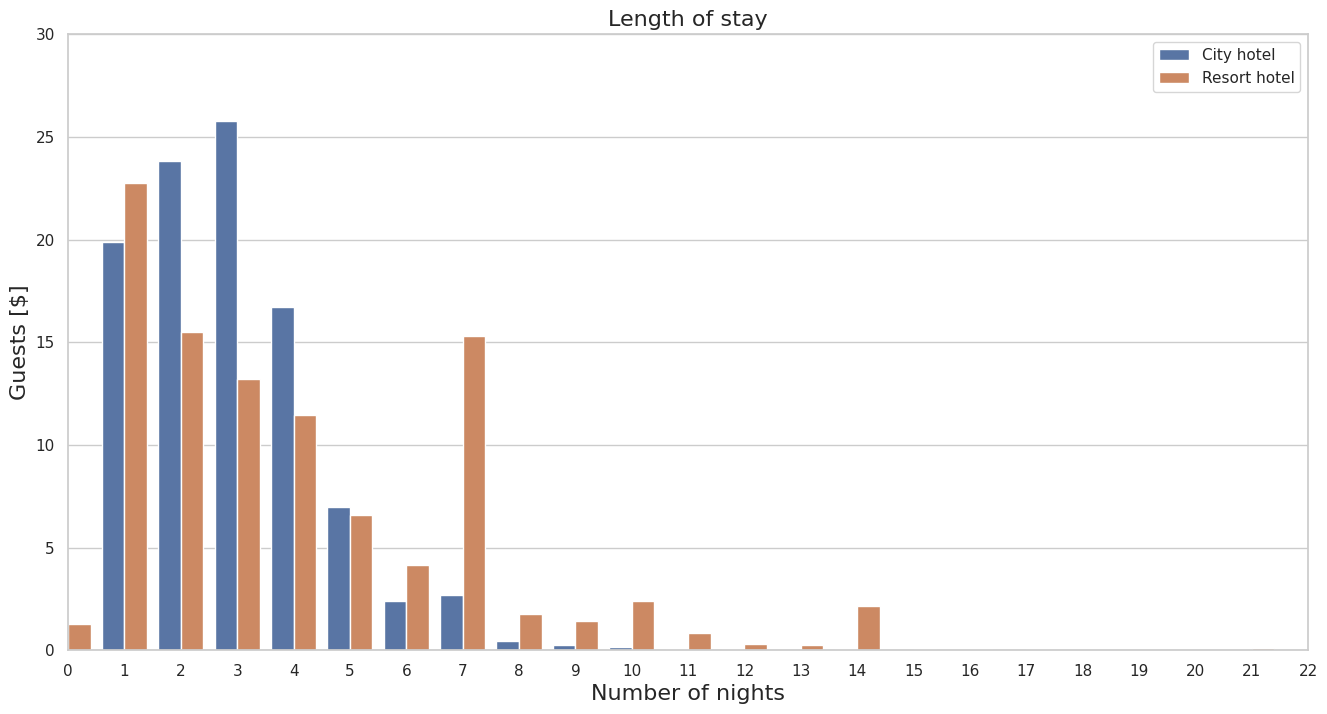

In [27]:
plt.figure(figsize=(16,8))
sns.barplot(x="num_nights",
            y="rel_num_booking",
            hue="hotel",
            data=nights_data,
            hue_order=["City hotel","Resort hotel"])
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [$]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.ylim(0,30)
plt.show()

* City hotel: 평균 2.92박, 최대 48박 / 1~4박을 선호
* Resort hotel: 평균 4.14박, 최대 69박 / 1~4박 선호하나 7박도 선호

In [28]:
#예약 경로
segments=full_data_cln["market_segment"].value_counts()

fig= px.pie(segments,
            values=segments.values,
            names=segments.index,
            title="Booking per market segment",
            template="seaborn")

fig.update_traces(rotation= -90,
                 textinfo="percent+label")
fig.show()

* 온라인 예약 > 오프라인 > 단체 > 직접 순으로 많음

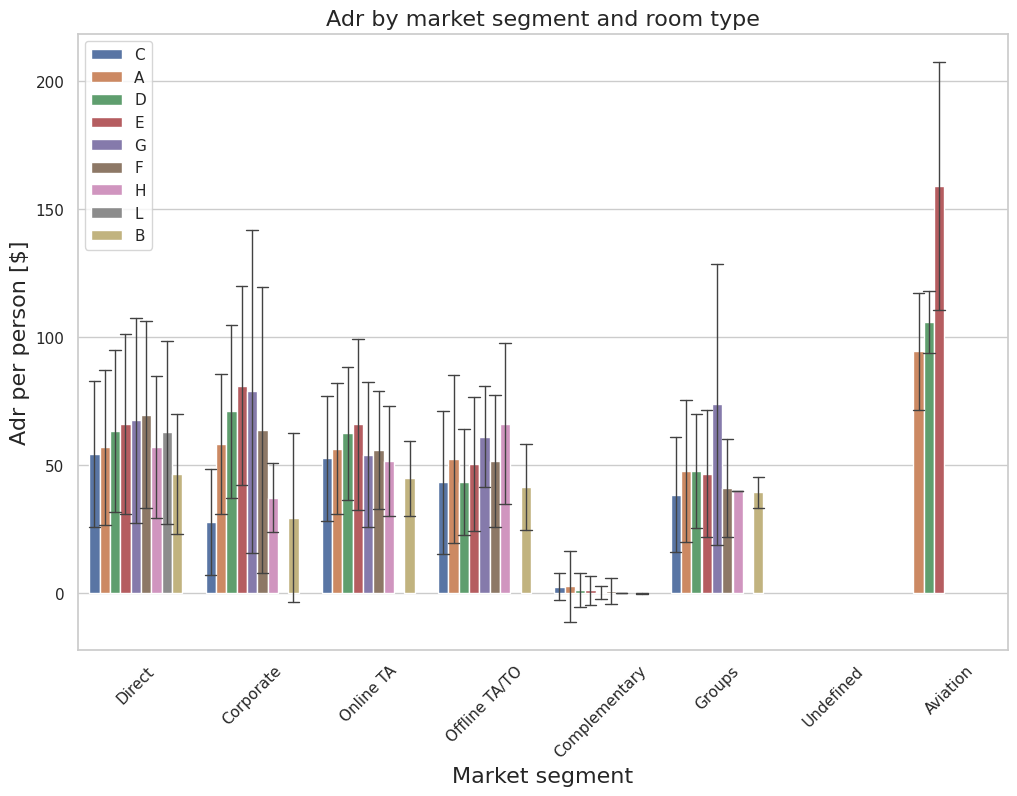

In [29]:
#1박당, 1인당 예약에 사용된 비용
plt.figure(figsize=(12,8))
sns.barplot(x="market_segment",
            y="adr_pp",
            hue="reserved_room_type",
            data=full_data_cln,
            errorbar='sd',
            errwidth=1,
            capsize=0.1)
plt.title("Adr by market segment and room type", fontsize=16)
plt.xlabel("Market segment", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Adr per person [$]", fontsize=16)
plt.legend(loc="upper left")

plt.show()

* 평균적으로 그룹 예약은 G room 예약 / 평균적으로 가격대가 가장 좋음
* Aviation 이 가장 가격대가 높음: Aviation (?)
* G, E room 이 전체적으로 인기

In [30]:
Airline_data=full_data_cln.loc[full_data_cln["market_segment"]=="Aviation"][["is_canceled", "adults","lead_time", "adr_pp"]].describe()

Non_Airline_data=full_data_cln.loc[full_data_cln["market_segment"]=="Aviation"][["is_canceled","adults","lead_time","adr_pp"]].describe()

In [31]:
Airline_data

,is_canceled,adults,lead_time,adr_pp
count,235.000000,235.000000,235.00000,235.000000
mean,0.221277,1.012766,4.47234,100.270979
std,0.415992,0.112503,4.61629,20.376689
min,0.000000,1.000000,0.00000,0.000000
25%,0.000000,1.000000,1.00000,95.000000
50%,0.000000,1.000000,3.00000,95.000000
75%,0.000000,1.000000,6.00000,110.000000
max,1.000000,2.000000,23.00000,193.500000


In [32]:
Non_Airline_data

,is_canceled,adults,lead_time,adr_pp
count,235.000000,235.000000,235.00000,235.000000
mean,0.221277,1.012766,4.47234,100.270979
std,0.415992,0.112503,4.61629,20.376689
min,0.000000,1.000000,0.00000,0.000000
25%,0.000000,1.000000,1.00000,95.000000
50%,0.000000,1.000000,3.00000,95.000000
75%,0.000000,1.000000,6.00000,110.000000
max,1.000000,2.000000,23.00000,193.500000


from matplotlib import pyplot as plt
_df_15['is_canceled'].plot(kind='hist', bins=20, title='is_canceled')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16['adults'].plot(kind='hist', bins=20, title='adults')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['lead_time'].plot(kind='hist', bins=20, title='lead_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['adr_pp'].plot(kind='hist', bins=20, title='adr_pp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_19.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='is_canceled', y='adults', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='adults', y='lead_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='lead_time', y='adr_pp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lead_time']
  ys = series['is_canceled']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('lead_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lead_time')
_ = plt.ylabel('is_canceled')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lead_time']
  ys = series['adults']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('lead_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lead_time')
_ = plt.ylabel('adults')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lead_time']
  ys = series['adr_pp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('lead_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lead_time')
_ = plt.ylabel('adr_pp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['lead_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'lead_time'}, axis=1)
              .sort_values('lead_time', ascending=True))
  xs = counted['lead_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('lead_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lead_time')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_27['is_canceled'].plot(kind='line', figsize=(8, 4), title='is_canceled')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['adults'].plot(kind='line', figsize=(8, 4), title='adults')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['lead_time'].plot(kind='line', figsize=(8, 4), title='lead_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['adr_pp'].plot(kind='line', figsize=(8, 4), title='adr_pp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_31['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_31, x='is_canceled', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_32['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_32, x='adults', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_33['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_33, x='lead_time', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_34['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_34, x='adr_pp', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

* 예약까지의 기간이 가장 짧음: 최소 4일~최대 104일
* 항공사 직원은 각 방 필요 > 가족보다 더 많은 방 필요

In [33]:
#취소율 확인
total_cancellations = full_data_cln["is_canceled"].sum()
rh_cancellations = full_data_cln.loc[full_data_cln["hotel"] == "Resort Hotel"]["is_canceled"].sum()
ch_cancellations = full_data_cln.loc[full_data_cln["hotel"] == "City Hotel"]["is_canceled"].sum()

rel_cancel = total_cancellations / full_data_cln.shape[0] * 100
rh_rel_cancel = rh_cancellations / full_data_cln.loc[full_data_cln["hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = ch_cancellations / full_data_cln.loc[full_data_cln["hotel"] == "City Hotel"].shape[0] * 100

print(f"Total bookings canceled: {total_cancellations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {rh_cancellations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel bookings canceled: {ch_cancellations:,} ({ch_rel_cancel:.0f} %)")

Total bookings canceled: 44,199 (37 %)
Resort hotel bookings canceled: 11,120 (28 %)
City hotel bookings canceled: 33,079 (42 %)


* 전체 취소율: 37%
* Resort 취소율: 28%
* CIty 취소율: 42%

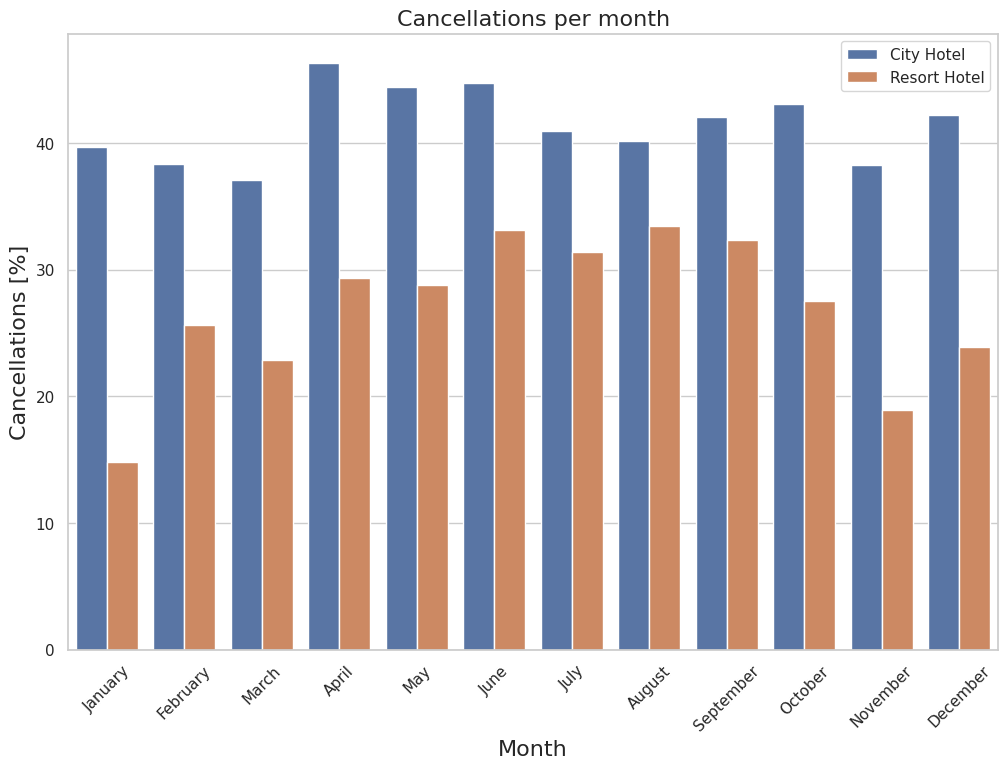

In [34]:
#취소율이 가장 높은 달
res_book_per_month = full_data_cln.loc[(full_data_cln["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = full_data_cln.loc[(full_data_cln["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = full_data_cln.loc[(full_data_cln["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = full_data_cln.loc[(full_data_cln["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancellations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancellations": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancellations"] / full_cancel_data["Bookings"] * 100

ordered_months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancellations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancellations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

* City hotel: 연 평균 40% 대로, 비슷한 취소율
* Resort hotel: 여름이 가장 취소율이 높고, 겨울이 가장 낮음

# 취소율 예측

In [35]:
#중요도
cancel_corr = data.select_dtypes(include='number').corr()["is_canceled"]
cancel_corr.abs().sort_values (ascending=False) [1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

* 리드타임, 요구사항, 주차공간, 예약변경, 사전 취소 가 가장 중요.
*  "booking_changes", "days_in_waiting_list", "arrival_date_year", "reservation_status" 불필요: 제외
*  "booking_changes" : 취소 여부 예측시에 부정확할 수 있어 제외

In [36]:
data.groupby("is_canceled")["reservation_status"].value_counts()

is_canceled  reservation_status
0            Check-Out             75166
1            Canceled              43017
             No-Show                1207
Name: reservation_status, dtype: int64

예약 상태: 취소 43017건

In [37]:
# 다른 데이터와 비교
## arrival_date_year, assigned_room_type, booking_changes, reservation_status, country, days_in_waiting_list 제외

num_features = ["lead_time", "arrival_date_week_number", "arrival_date_day_of_month", "stays_in_weekend_nights", "stays_in_week_nights","adults","children","babies","is_repeated_guest","previous_cancellations",
                "previous_bookings_not_canceled","agent","company","required_car_parking_spaces","total_of_special_requests","adr"]
cat_features = ["hotel", "arrival_date_month","meal", "market_segment","distribution_channel","reserved_room_type","deposit_type","customer_type"]

# 특징과 예측값 분리
features = num_features + cat_features
x = data .drop(["is_canceled"], axis=1)[features]
y = data ["is_canceled"]

# 결측값 처리
num_transformer = SimpleImputer(strategy="constant")

# 범주형 특성 전처리
cat_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant",fill_value="Unkwon")),
                                  ("onehot", OneHotEncoder(handle_unknown='ignore'))])

# 숫자, 범주형 특성 번들 전처리
preprocessor=ColumnTransformer(transformers=[("num",num_transformer, num_features),
                                             ("cat",cat_transformer, cat_features)])


In [38]:
# 테스트 모델 정의
base_models = [("DT_model",DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42, n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42, n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]

# 교차검증: Kfolds 부분으로 분할
# 데이터 셔플
kfolds = 4  # 25%
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

# 전처리, 피팅, 예측, 점수
for name, model in base_models:
    # 전처리 데이터, 파이프라인 모델 묶음
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('model', model)])

    # 각 모델 교차검증 점수
    cv_results = cross_val_score(model_steps,
                                 x,y,
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
    # 결과
    min_score = round(min(cv_results),4)
    max_score = round(max(cv_results),4)
    mean_score = round(np.mean(cv_results),4)
    std_dev = round(np.std(cv_results),4)
    print(f"{name}cross validation accuarcy score: {mean_score}+/-{std_dev}(std) min:{min_score}, max: {max_score}")


DT_modelcross validation accuarcy score: 0.8246+/-0.0016(std) min:0.8221, max: 0.8263
RF_modelcross validation accuarcy score: 0.8664+/-0.0012(std) min:0.8646, max: 0.8676
LR_modelcross validation accuarcy score: 0.7937+/-0.0011(std) min:0.7921, max: 0.7951
XGB_modelcross validation accuarcy score: 0.8456+/-0.0004(std) min:0.8451, max: 0.8461


* RF_model 이 가장 정확도가 높음.
* 하이퍼파라미터 > 큰 향상 없음


In [39]:
# RF_model 강화
rf_model_enh = RandomForestClassifier(n_estimators=160,
                                      max_features=0.4,
                                      min_samples_split=2,
                                      n_jobs=-1,
                                      random_state=0)

kfolds = 4  # 25%
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
model_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', rf_model_enh)])
cv_results = cross_val_score(model_pipe,
                             x,y,
                             cv=split,
                             scoring="accuracy",
                             n_jobs=-1)

min_score = round(min(cv_results),4)
max_score = round(max(cv_results),4)
mena_score = round(np.mean(cv_results),4)
std_dev = round(np.std(cv_results),4)
print(f"Enhasced RF model cross validation accruary score: {mean_score} +/- {std_dev} (std) min:{min_score}, max:{max_score}")

Enhasced RF model cross validation accruary score: 0.8456 +/- 0.0006 (std) min:0.8673, max:0.869


# 중요도 평가

In [40]:
model_pipe .fit(x,y)

onehot_columns = list(model_pipe .named_steps ['preprocessor'].
                      named_transformers_['cat'].
                      named_steps['onehot'].
                      get_feature_names_out(input_features=cat_features))

feat_imp_list = num_features + onehot_columns

feat_imp_df = eli5.formatters.as_dataframe.explain_weights_df(
    model_pipe.named_steps['model'],
    feature_names=feat_imp_list)
feat_imp_df.head(10)

,feature,weight,std
0,lead_time,0.145140,0.015235
1,deposit_type_Non Refund,0.140641,0.108007
2,adr,0.096222,0.003412
3,deposit_type_No Deposit,0.079059,0.106235
4,arrival_date_day_of_month,0.069410,0.002033
5,arrival_date_week_number,0.053763,0.001999
6,total_of_special_requests,0.050567,0.013314
7,agent,0.043060,0.006392
8,stays_in_week_nights,0.041588,0.002291
9,previous_cancellations,0.038626,0.013459


from matplotlib import pyplot as plt
_df_0['weight'].plot(kind='hist', bins=20, title='weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='weight', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['weight'].plot(kind='line', figsize=(8, 4), title='weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

* lead_time, deposit, adt 중요

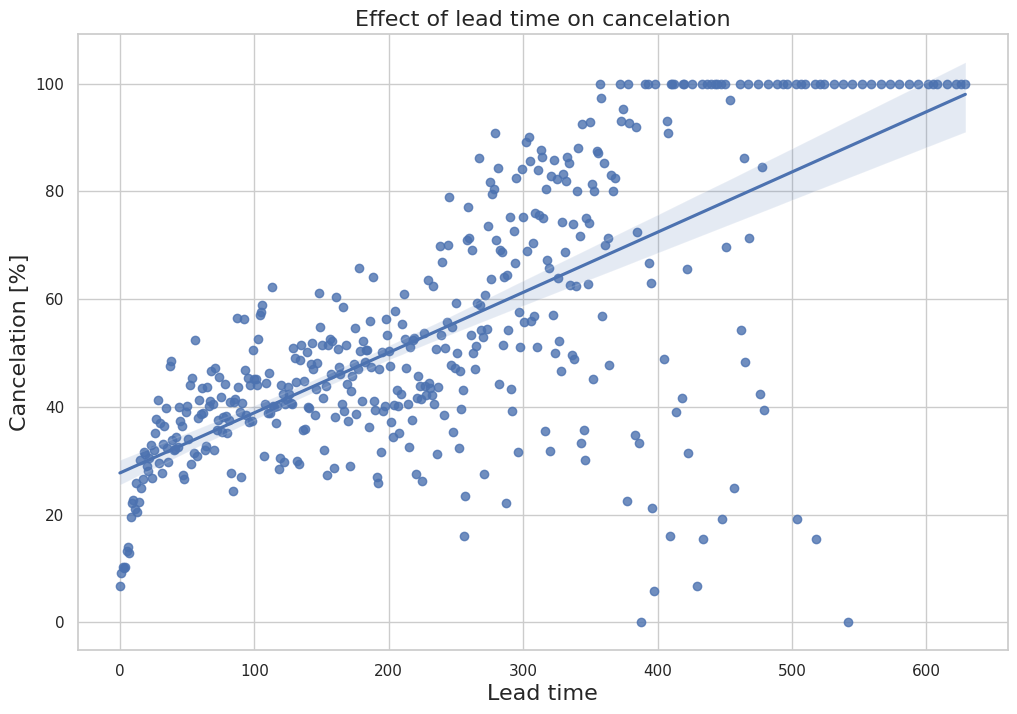

In [41]:
# lead time
lead_cancel_data = full_data_cln.groupby("lead_time")["is_canceled"].describe()

lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

plt.figure(figsize=(12,8))
sns.regplot(x=lead_cancel_data_10.index,
            y=lead_cancel_data_10["mean"].values*100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelation [%]", fontsize=16)

plt.show()


* 리드타임이 길 수록 취소율이 낮아짐


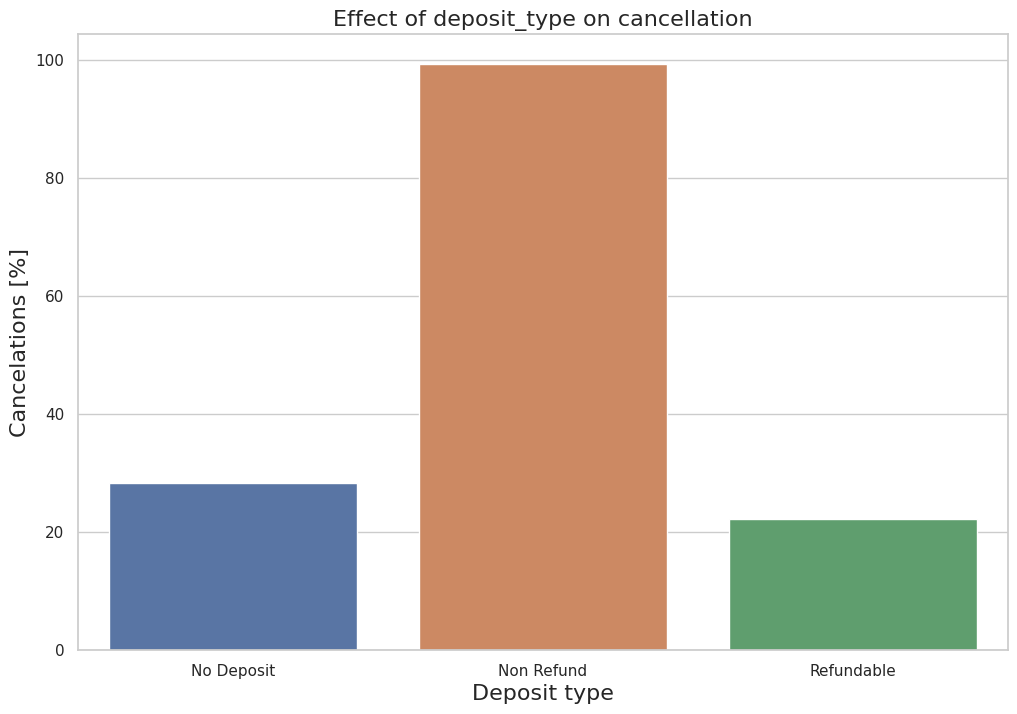

In [42]:
# Deposit

deposit_cancel_data = full_data_cln.groupby("deposit_type")["is_canceled"].describe()

plt.figure(figsize=(12,8))
sns.barplot(x=deposit_cancel_data.index,
            y=deposit_cancel_data["mean"]*100)
plt.title("Effect of deposit_type on cancellation", fontsize=16)
plt.xlabel("Deposit type", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

* 취소율이 높은 것 > 데이터 오류가 있지 않은 가

In [43]:
deposit_mean_data = full_data_cln.groupby("deposit_type").mean()
deposit_mean_data

<ipython-input-43-3f60efa0afa3>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,adr_pp
deposit_type,,,,,,,,,,,,,,,,,,,,,
No Deposit,0.284020,88.841951,2016.173950,27.133208,15.815223,0.969615,2.555633,1.865806,0.118604,0.009085,0.035295,0.042044,0.154938,0.247030,91.048126,11.175874,1.518040,103.685436,0.071184,0.651726,55.233383
Non Refund,0.993624,212.908891,2016.031466,27.448619,15.595462,0.621718,2.091109,1.811407,0.000617,0.000000,0.004387,0.411462,0.010626,0.012477,55.248165,6.215809,7.992253,89.964017,0.000069,0.001782,54.520286
Refundable,0.222222,152.098765,2016.141975,20.932099,23.456790,0.975309,2.851852,1.907407,0.030864,0.000000,0.024691,0.000000,0.018519,0.592593,189.625000,133.666667,9.586420,76.209753,0.123457,0.141975,41.444239


from matplotlib import pyplot as plt
deposit_mean_data['is_canceled'].plot(kind='hist', bins=20, title='is_canceled')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
deposit_mean_data['lead_time'].plot(kind='hist', bins=20, title='lead_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
deposit_mean_data['arrival_date_year'].plot(kind='hist', bins=20, title='arrival_date_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
deposit_mean_data['arrival_date_week_number'].plot(kind='hist', bins=20, title='arrival_date_week_number')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
deposit_mean_data.plot(kind='scatter', x='is_canceled', y='lead_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
deposit_mean_data.plot(kind='scatter', x='lead_time', y='arrival_date_year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
deposit_mean_data.plot(kind='scatter', x='arrival_date_year', y='arrival_date_week_number', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
deposit_mean_data.plot(kind='scatter', x='arrival_date_week_number', y='arrival_date_day_of_month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lead_time']
  ys = series['is_canceled']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = deposit_mean_data.sort_values('lead_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lead_time')
_ = plt.ylabel('is_canceled')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lead_time']
  ys = series['arrival_date_year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = deposit_mean_data.sort_values('lead_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lead_time')
_ = plt.ylabel('arrival_date_year')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lead_time']
  ys = series['arrival_date_week_number']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = deposit_mean_data.sort_values('lead_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lead_time')
_ = plt.ylabel('arrival_date_week_number')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lead_time']
  ys = series['arrival_date_day_of_month']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = deposit_mean_data.sort_values('lead_time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lead_time')
_ = plt.ylabel('arrival_date_day_of_month')

from matplotlib import pyplot as plt
deposit_mean_data['is_canceled'].plot(kind='line', figsize=(8, 4), title='is_canceled')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
deposit_mean_data['lead_time'].plot(kind='line', figsize=(8, 4), title='lead_time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
deposit_mean_data['arrival_date_year'].plot(kind='line', figsize=(8, 4), title='arrival_date_year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
deposit_mean_data['arrival_date_week_number'].plot(kind='line', figsize=(8, 4), title='arrival_date_week_number')
plt.gca().spines[['top', 'right']].set_visible(False)

* Not refund: 평균 예약하는 데에 걸리는 시간 2배 이상 김
* 재방문 여부: 10%
* 이전 취소율: 10배 이상
* 요청사항은 잘 없음

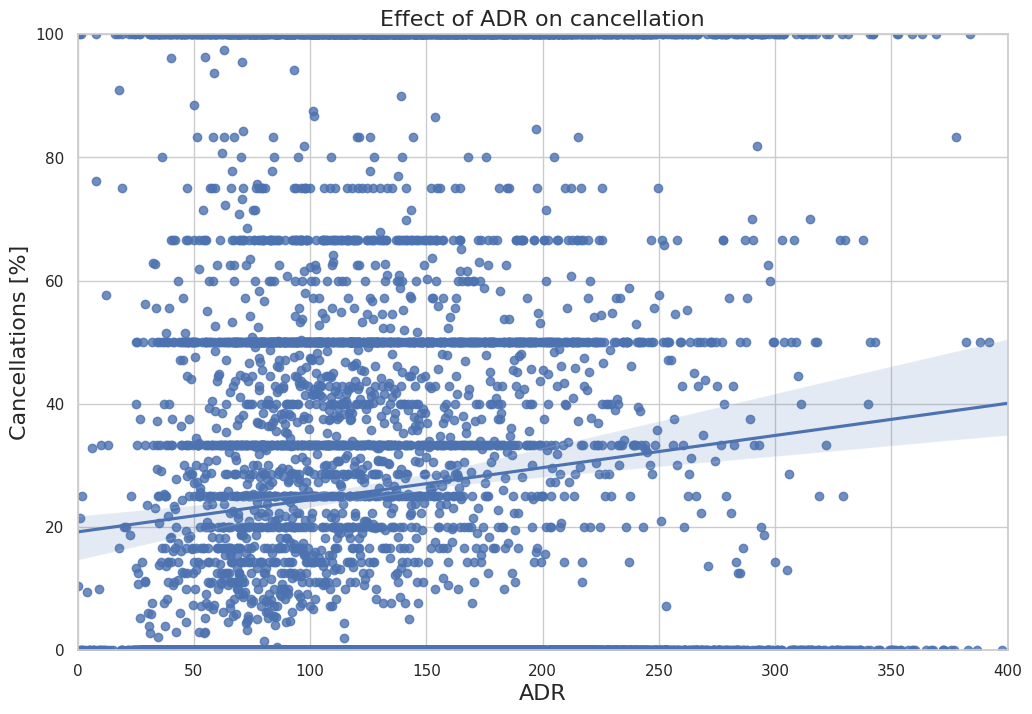

In [49]:
#ADR

adr_cancel_data = full_data_cln.groupby("adr")["is_canceled"].describe()

plt.figure(figsize=(12,8))
sns.regplot(x=adr_cancel_data.index,
            y=adr_cancel_data["mean"].values*100)
plt.title("Effect of ADR on cancellation", fontsize=16)
plt.xlabel("ADR", fontsize=16)
plt.ylabel("Cancellations [%]", fontsize=16)
plt.xlim(0,400)
plt.ylim(0,100)
plt.show()

* 많이 쓸 수록 예약 취소율이 높아짐



In [51]:
#deposit 제외

cat_features_non_dep = ["hotel","arrival_date_month","meal","market_segment", "distribution_channel","reserved_room_type","customer_type"]

features_non_dep = num_features + cat_features_non_dep
X_non_dep = data.drop(["is_canceled"], axis=1)[features_non_dep]

preprocessor_non_dep = ColumnTransformer(transformers = [("num", num_transformer, num_features),
                                                         ("cat",cat_transformer, cat_features_non_dep)])

X_non_dep = data.drop(["is_canceled"], axis=1)[features_non_dep]

rf_model_non_dep = RandomForestClassifier(random_state=42)

kfolds=4
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
model_pipe =Pipeline(steps=[('preprocessor', preprocessor_non_dep),
                            ('model', rf_model_non_dep)])

cv_results = cross_val_score(model_pipe,
                             X_non_dep, y,
                             cv= split,
                             scoring = "accuracy",
                             n_jobs=-1)

min_score=round(min(cv_results),4)
max_score-round(max(cv_results),4)
mean_score=round(np.mean(cv_results),4)
std_dev=round(np.std(cv_results),4)
print(f"RF model without deposit_tyep feature cross validation accuracy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")


RF model without deposit_tyep feature cross validation accuracy score: 0.8653 +/- 0.0013 (std) min: 0.8631, max: 0.869


In [52]:
feat_imp_df.head(10)

,feature,weight,std
0,lead_time,0.145140,0.015235
1,deposit_type_Non Refund,0.140641,0.108007
2,adr,0.096222,0.003412
3,deposit_type_No Deposit,0.079059,0.106235
4,arrival_date_day_of_month,0.069410,0.002033
5,arrival_date_week_number,0.053763,0.001999
6,total_of_special_requests,0.050567,0.013314
7,agent,0.043060,0.006392
8,stays_in_week_nights,0.041588,0.002291
9,previous_cancellations,0.038626,0.013459


from matplotlib import pyplot as plt
_df_5['weight'].plot(kind='hist', bins=20, title='weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='weight', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['weight'].plot(kind='line', figsize=(8, 4), title='weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

* 리드타임이 길 수록 취소율이 낮아짐
* 디파짓 환불 불가일 수 록 취소율이 높아짐
* 요금이 높을 수록 취소율이 높아짐
* 요청이 많을 수록 취소율이 높아짐
* 주중 숙박일이 많을 수록 취소율이 낮아짐
* 이전 취소 이력이 있는 경우 취소율이 높아짐


In [63]:
model_pipe.fit(X_non_dep,y)

onehot_columns = list(model_pipe.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(input_features=cat_features_non_dep))

feat_imp_list = num_features + onehot_columns

feat_imp_df_non_dep = eli5.formatters.as_dataframe.explain_weights_df(
    model_pipe.named_steps['model'],
    feature_names=feat_imp_list)

feat_imp_df_non_dep.head(10)

,feature,weight,std
0,lead_time,0.175189,0.019580
1,adr,0.111566,0.008185
2,total_of_special_requests,0.078749,0.013435
3,arrival_date_day_of_month,0.076958,0.003056
4,arrival_date_week_number,0.060699,0.004069
5,agent,0.054862,0.009409
6,stays_in_week_nights,0.049275,0.004647
7,previous_cancellations,0.047592,0.016409
8,stays_in_weekend_nights,0.031298,0.002617
9,customer_type_Transient,0.028016,0.018087


from matplotlib import pyplot as plt
_df_10['weight'].plot(kind='hist', bins=20, title='weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='weight', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['weight'].plot(kind='line', figsize=(8, 4), title='weight')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

* 리드타임이 길 수록 취소율이 낮아짐
* 요금이 높을 수록 취소율이 높아짐
* 요청이 많을 수록 취소율이 높아짐
* 주중 숙박이 많을 수록 취소율이 낮아짐
* 취소 이력이 있는 사람은 취소율이 높음
* 주말 숙박이 많을 수록 취소율이 높아짐
* 단기 투숙객이 취소율이 높아짐